# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [581]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [582]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [583]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.T),y)
    return w

In [584]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    calc=ytest-np.dot(Xtest,w)
    calc_new=np.dot(calc.T,calc)
    rmse = np.sqrt(calc_new/ytest.shape[0])
    return rmse

In [585]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [586]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [587]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w=w.reshape(-1,1)
    calc=y-np.dot(X,w)
    error=np.dot(calc.T,calc)*0.5
    return error


In [588]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    w=w.reshape(-1,1)
    error_first = np.dot(np.dot(X.T,X),w)-np.dot(X.T,y)
    error_grad=error_first.flatten()
    return error_grad

In [589]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 47.99
Gradient Descent Linear Regression RMSE on test data - 54.95


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [590]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [591]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ylist=[]
    for i in range(0,len(Xtest)):
        if np.dot(Xtest[i],w)>= 0:
            ylist.append(1)
        else:
            ylist.append(-1)
    
    ypred=np.array(ylist)
    return ypred

In [592]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    accnum=0
    ypred = predictLinearModel(w,Xtest)
    for i in range(0,len(ytest)):
        if ypred[i]==ytest[i]:
            accnum+=1
    acc=accnum/len(ytest)  
    return acc

In [593]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [594]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [595]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    sum = 0
    for i in range(0, len(X)):
        inner = np.log(1+np.exp(np.dot(-y[i],np.dot(w.T,X[i]))))
        sum += inner
    error = sum/len(X)
    return error


In [596]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    sum=np.zeros(X.shape[1])
    for i in range(0,len(X)):
        frac = y[i]/(1+np.exp(np.dot(y[i],np.dot(w.T,X[i]))))
        inn = frac*X[i]
        sum+=inn
    gradient = sum/-len(X)
    return gradient

In [597]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    sum=np.zeros((X.shape[1],X.shape[1]))
    
    for i in range(0,len(X)):
        exp = np.exp(np.dot(y[i],np.dot(w.T,X[i])))
        frac = exp/(1+exp)**2
        inn = frac*np.dot(np.matrix(X[i]).T,np.matrix(X[i]))

        sum+=inn
    hess = sum / len(X)
    hessian=np.matrix(hess)
    return hessian

In [598]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [599]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [600]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    for i in range(0, T):
        # Method 1: using only one training data as sample in each iteration
        #
        sample_ind = np.random.choice(X.shape[0], 1)
        loss = y[sample_ind] * np.dot(w.transpose(), X[sample_ind].transpose())
        if loss < 1:
            w += eta * y[sample_ind] * X[sample_ind].transpose()
        #
        # Method 1 END

        # Method 2: using 10% training data as samples in each iteration
        #
        # batch_size = (int)(X.shape[0]/10)
        # mini_batch = np.random.choice(X.shape[0], batch_size, replace = False)
        # loss = np.sum(y[mini_batch] * np.dot(w.transpose(), X[mini_batch].transpose()).transpose()) / batch_size
        # if loss < 1:
        #     for j in mini_batch:
        #         w += eta * y[j] * X[[j]].transpose() / batch_size
        #
        # Method 2 END
    return w



In [601]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 

# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.84
SVM Accuracy on test data - 0.87


### Problem 6 - Plotting decision boundaries

In [602]:
print('Problem 6')
print('---------')

Problem 6
---------


In [603]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

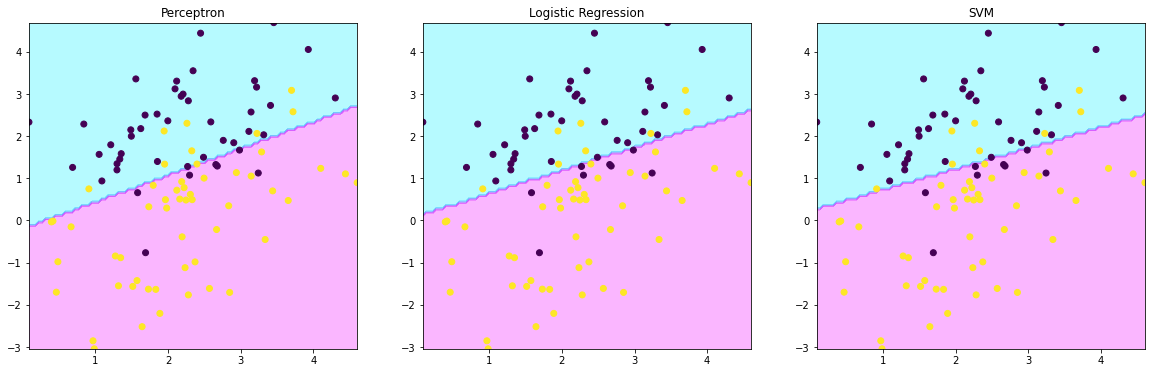

In [604]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
# PLUS,if needed, you can add at most extra 2 lines for each model.
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
perceptron_soln = minimize(regressionObjVal, w_perceptron, jac=regressionGradient, args=(Xtrain_i,ytrain), method='CG', options={'maxiter' : 50})
w_perceptron = np.transpose(np.array(perceptron_soln.x))[:,np.newaxis]

w_logistic = np.zeros((Xtrain_i.shape[1],1))
logistic_soln = minimize(logisticObjVal, w_logistic, jac=logisticGradient, hess=logisticHessian, args=(Xtrain_i,ytrain), method='Newton-CG', options={'maxiter' : 50})
w_logistic = np.transpose(np.array(logistic_soln.x))[:,np.newaxis]

w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)

fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
